In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
print(torch.__version__)
print(torch.version.cuda)


# Core packages for text processing.

import string
import re

# Base path for Kaggle input directory
base_path = '/kaggle/input/projet-ter/'  # Update this path if it's different

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

#!pip install GPUtil

from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    # Vérifier si CUDA est disponible
    if not torch.cuda.is_available():
        print("CUDA n'est pas disponible. Aucun GPU trouvé !")
        return

    print("Utilisation initiale du GPU")
    gpu_usage()

    # Essayer de vider le cache du GPU
    try:
        torch.cuda.empty_cache()
    except RuntimeError as e:
        print("Erreur lors du vidage du cache CUDA :", e)

    # Réinitialiser le contexte CUDA
    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("Utilisation du GPU après avoir vidé le cache")
    gpu_usage()

free_gpu_cache()



2.0.0
11.8
Utilisation initiale du GPU
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
Utilisation du GPU après avoir vidé le cache
| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


In [5]:
file_names = [
    "articles_24 Heures au BCnin.www.24haubenin.info_.csv",
    "articles_Africa 24.www.youtube.com_channel_UCmEcEP_oCZJ6Mr1uxhUFyRg.csv",
    "articles_Agence de Presse Sngalaise Youtube.www.youtube.com_channel_UC8uoOv4RSzdZKlmPTguYjtg.csv",
    "articles_Agence de Presse Sngalaise.www.aps.sn_.csv",
    "articles_Banouto Media.www.youtube.com_channel_UCwsXkG4LatsF7u_b8dU1p-w.csv",
    "articles_Banouto.www.banouto.bj_.csv",
    "articles_Burkina24 Youtube.www.youtube.com_channel_UCJtaDORHQO20XA-tFwpJysQ.csv",
    "articles_Burkina24.burkina24.com_.csv",
    "articles_Dakaractu TV HD.www.youtube.com_channel_UCG0t6XiAHui-ziz7SwFTN0g.csv",
    "articles_Dakaractu.www.dakaractu.com_.csv",
    "articles_Fraternit.www.fraternitebj.info_.csv",
    "articles_JeuneAfrique Youtube.www.youtube.com_channel_UCWkbzzrku8lwKK6DoBl4yTg.csv",
    "articles_JeuneAfrique.www.jeuneafrique.com_.csv",
    "articles_LObs.www.lobs.sn_.csv",
    "articles_La Nation.lanation.bj_.csv",
    "articles_La Nouvelle Tribune.lanouvelletribune.info_.csv",
    "articles_Le Matinal.groupelematinal.com_category_actualites_.csv",
    "articles_Le Quotidien.lequotidien.sn_.csv",
    "articles_ORTB.www.youtube.com_channel_UCmPXzeJaO7nrA87GIz3N6wQ.csv",
    "articles_RTB - Radiodiffusion Tlvision du Burkina.www.youtube.com_channel_UCZl9utbYlPMssMhgrGUqXZA.csv",
    "articles_SIKKA TELEVISION.www.youtube.com_channel_UCplwKOWLV8s2XZBMsimOjvg.csv",
    "articles_Senegal7.www.youtube.com_channel_UC5eVGjO4ITJA1KM_tva_OSQ.csv",
    "articles_Sud Quotidien TV.www.youtube.com_channel_UCD-YykHgK3BOvnqFlcOFXIA.csv",
    "articles_Sud Quotidien.www.sudquotidien.sn_.csv",
    "articles_TFM (Tl Futurs Medias).www.youtube.com_channel_UC5NQ49FVRIAuWE1el6L2gkg.csv",
    "articles_aCotonou Youtube.www.youtube.com_channel_UCdNz-U4WJwFvbMDMdgYNMrg.csv",
    "articles_aCotonou.news.acotonou.com_.csv",
    "articles_le faso.lefaso.net_.csv",
    "articles_le soleil.lesoleil.sn_.csv",
]

# Initialize an empty list to store dataframes
dfs = []

# Loop through the file names
for file_name in file_names:
    file_path = f"{base_path}{file_name}"
    
    # Read each file into a dataframe
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        
        # Check if 'source' column exists and does not contain YouTube links
        if 'source' in df.columns and not df['source'].str.contains('youtube.com').any():
            dfs.append(df)

# Concatenate all the dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Verify the combined dataframe
print(f"\nTotal number of records in the combined dataframe: {len(combined_df)}")


Total number of records in the combined dataframe: 23894


In [6]:
combined_df.head()

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Environement (m)
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Societe (m)
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),No (m),No (m),No (m),Societe (m)
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),Yes (m),Yes (m),Yes (m),Economie (m)
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Sport (m)


In [7]:
# Columns of interest
cols_of_interest = ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']

# Print unique values for each column
for col in cols_of_interest:
    unique_values = combined_df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'CLS_Lexique Sécurité Alimentaire': ['no (m)' 'yes (m)' nan]
Unique values in 'CLS_Relevance': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)' 'Partial (u)']
Unique values in 'CLS_Usefulness': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)']
Unique values in 'CLS_Relevance Yes/No': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)']


In [8]:
# Converting values to lowercase
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        combined_df[col] = combined_df[col].str.lower()


# Filtering the dataframe
# Define the values we're interested in
allowed_values = ['no (m)', 'yes (m)', 'no (u)', 'yes (u)']

# Create the test dataframe
test_df = combined_df[
    combined_df['CLS_Lexique Sécurité Alimentaire'].isin(allowed_values) &
    combined_df['CLS_Relevance'].isin(allowed_values) &
    combined_df['CLS_Usefulness'].isin(allowed_values) &
    combined_df['CLS_Relevance Yes/No'].isin(allowed_values)
]

# Mapping 'yes (m)', 'yes (u)' to 'yes' and 'no (m)', 'no (u)' to 'no'
mapping = {'yes (m)': 'yes', 'yes (u)': 'yes', 'no (m)': 'no', 'no (u)': 'no'}

for col in ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']:
    test_df[col] = test_df[col].map(mapping)

# Display the first few rows of the test dataframe
test_df.head()

/tmp/ipykernel_27/150045564.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = test_df[col].map(mapping)
/tmp/ipykernel_27/150045564.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = test_df[col].map(mapping)
/tmp/ipykernel_27/150045564.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
0,0bv7191eos,passer de 75% à 100% de couverture des cantine...,passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?passer-de-75-a-10...,fr,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no,no,no,no,environement (m)
1,1z3zw3biic,le procès des personnes arrêtées au cnhu renvo...,le procès des personnes arrêtées au cnhu renvo...,https://www.24haubenin.info/?le-proces-des-per...,fr,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no,no,no,no,societe (m)
2,20w0vlvuc3,nouvel enrôlement au ravip pour les femmes et ...,nouvel enrôlement au ravip pour les femmes et ...,https://www.24haubenin.info/?nouvel-enrolement...,fr,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes,no,no,no,societe (m)
3,7pmcbuvhsc,compte rendu du conseil des ministres du 26 oc...,compte rendu du conseil des ministres du 26 oc...,https://www.24haubenin.info/?compte-rendu-du-c...,fr,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes,yes,yes,yes,economie (m)
4,f2az2ppcrz,calendrier complet et groupes du chan 2022,calendrier complet et groupes du chan 2022\n\n...,https://www.24haubenin.info/?calendrier-comple...,fr,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no,no,no,no,sport (m)


In [9]:
import re
from sklearn.model_selection import train_test_split

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
 
    # Lowercase the text
    text = text.lower()
    return text

# Apply text cleaning using .loc to avoid SettingWithCopyWarning
test_df.loc[:, 'cleaned_text'] = test_df['text'].apply(clean_text)


test_df.head()

/tmp/ipykernel_27/2968586616.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'cleaned_text'] = test_df['text'].apply(clean_text)


,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic,cleaned_text
0,0bv7191eos,passer de 75% à 100% de couverture des cantine...,passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?passer-de-75-a-10...,fr,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,environement (m),passer de 75% à 100% de couverture des cantine...
1,1z3zw3biic,le procès des personnes arrêtées au cnhu renvo...,le procès des personnes arrêtées au cnhu renvo...,https://www.24haubenin.info/?le-proces-des-per...,fr,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,societe (m),le procès des personnes arrêtées au cnhu renvo...
2,20w0vlvuc3,nouvel enrôlement au ravip pour les femmes et ...,nouvel enrôlement au ravip pour les femmes et ...,https://www.24haubenin.info/?nouvel-enrolement...,fr,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,no,no,no,societe (m),nouvel enrôlement au ravip pour les femmes et ...
3,7pmcbuvhsc,compte rendu du conseil des ministres du 26 oc...,compte rendu du conseil des ministres du 26 oc...,https://www.24haubenin.info/?compte-rendu-du-c...,fr,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,yes,yes,yes,economie (m),compte rendu du conseil des ministres du 26 oc...
4,f2az2ppcrz,calendrier complet et groupes du chan 2022,calendrier complet et groupes du chan 2022\n\n...,https://www.24haubenin.info/?calendrier-comple...,fr,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,sport (m),calendrier complet et groupes du chan 2022\n\n...


# Nettoyage des Données

In [10]:
import re

def clean_text(text):
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-zA-Zéèàêâôûùïüë]', ' ', text)
    # Remplacer les multiples espaces par un seul
    text = re.sub(r'\s+', ' ', text)
    return text

# Appliquer la fonction de nettoyage
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

test_df.head()

/tmp/ipykernel_27/2356035009.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cleaned_text'] = test_df['text'].apply(clean_text)


,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic,cleaned_text
0,0bv7191eos,passer de 75% à 100% de couverture des cantine...,passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?passer-de-75-a-10...,fr,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,environement (m),passer de à de couverture des cantines scolair...
1,1z3zw3biic,le procès des personnes arrêtées au cnhu renvo...,le procès des personnes arrêtées au cnhu renvo...,https://www.24haubenin.info/?le-proces-des-per...,fr,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,societe (m),le procès des personnes arrêtées au cnhu renvo...
2,20w0vlvuc3,nouvel enrôlement au ravip pour les femmes et ...,nouvel enrôlement au ravip pour les femmes et ...,https://www.24haubenin.info/?nouvel-enrolement...,fr,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,no,no,no,societe (m),nouvel enrôlement au ravip pour les femmes et ...
3,7pmcbuvhsc,compte rendu du conseil des ministres du 26 oc...,compte rendu du conseil des ministres du 26 oc...,https://www.24haubenin.info/?compte-rendu-du-c...,fr,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,yes,yes,yes,economie (m),compte rendu du conseil des ministres du oct l...
4,f2az2ppcrz,calendrier complet et groupes du chan 2022,calendrier complet et groupes du chan 2022\n\n...,https://www.24haubenin.info/?calendrier-comple...,fr,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,sport (m),calendrier complet et groupes du chan la confé...


# Tokenisation avec Camembert

In [12]:
from transformers import CamembertTokenizer

# Charger le tokeniseur
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

def tokenize_text(text):
    # Tokeniser le texte
    return tokenizer.encode(text, truncation=True, padding='max_length', max_length=512)

# Appliquer la tokenisation
test_df['tokenized_text'] = test_df['cleaned_text'].apply(tokenize_text)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/tmp/ipykernel_27/1646413199.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tokenized_text'] = test_df['cleaned_text'].apply(tokenize_text)


In [13]:
# !pip install transformers torch
# bertopic, code pour trouver l'article qui représente le mieux le cluster, changer le nombre de cluster à la main
from transformers import CamembertTokenizer, CamembertModel
import torch

# Charger le tokeniseur et le modèle
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
model = CamembertModel.from_pretrained('camembert-base')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [14]:
def tokenize_and_format(text):
    tokens = tokenizer.encode_plus(text, max_length=512, truncation=True, padding='max_length', return_tensors='pt')
    return tokens['input_ids'], tokens['attention_mask']

# Appliquer la fonction de tokenisation
test_df['tokens'] = test_df['cleaned_text'].apply(tokenize_and_format)


/tmp/ipykernel_27/283190869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tokens'] = test_df['cleaned_text'].apply(tokenize_and_format)


## Extraction des Caractéristiques avec Batch Processing (c'est long) 

In [15]:
import torch

# S'assurer que CUDA est disponible et que le modèle est sur le GPU
cuda_available = torch.cuda.is_available()
if cuda_available:
    model = model.to('cuda')

def extract_features_in_batch(texts):
    # Préparer les lots
    tokens = tokenizer.batch_encode_plus(texts, max_length=512, padding='longest', truncation=True, return_tensors='pt')
    
    # Envoyer les données sur le GPU si CUDA est disponible
    if cuda_available:
        tokens = {key: value.to('cuda') for key, value in tokens.items()}
    
    # Exécution du modèle et désactivation du calcul du gradient pour économiser de la mémoire et accélérer
    with torch.no_grad():
        outputs = model(**tokens)
        last_hidden_states = outputs.last_hidden_state
        # Calculer la moyenne des états cachés et les envoyer de retour au CPU si nécessaire
        features = last_hidden_states.mean(dim=1).detach().cpu().numpy()
    return features

# Appliquer la fonction d'extraction des caractéristiques en lots
batch_size = 20  # Ajustez la taille des lots selon vos besoins et la mémoire disponible
features = []
for i in range(0, len(test_df), batch_size):
    batch_texts = test_df['cleaned_text'][i:i+batch_size].tolist()
    batch_features = extract_features_in_batch(batch_texts)
    features.extend(batch_features)

# Ajouter les vecteurs de caractéristiques extraits au DataFrame
test_df['features'] = features


/tmp/ipykernel_27/547274628.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['features'] = features


# PCA

## Choix du Nombre de Composantes

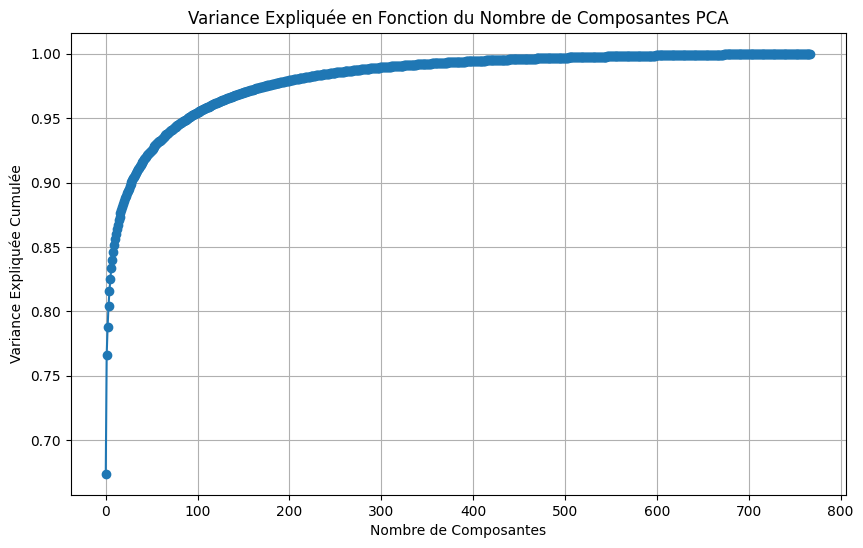

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertir les vecteurs de caractéristiques en une matrice
features_matrix = np.array(test_df['features'].tolist())

# Appliquer PCA sans réduire les dimensions
pca = PCA()
pca.fit(features_matrix)

# Calculer la variance expliquée cumulée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_)

# Tracer la courbe de la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(variance_cumulee, marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Variance Expliquée en Fonction du Nombre de Composantes PCA')
plt.grid()
plt.show()

on garde 100 composantes qui résument 95% de l'information

## PCA

In [17]:
# !pip install scikit-learn

from sklearn.decomposition import PCA
import numpy as np

# Combien de composantes vous souhaitez garder
n_components = 100  

# Convertir la liste de vecteurs en une matrice NumPy
features_matrix = np.array(test_df['features'].tolist())

# Initialiser PCA
pca = PCA(n_components=n_components)

# Appliquer PCA
reduced_features = pca.fit_transform(features_matrix)

# Ajouter les caractéristiques réduites au DataFrame
test_df['reduced_features'] = list(reduced_features)


/tmp/ipykernel_27/1431667495.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['reduced_features'] = list(reduced_features)


# Clustering 

## Trouver le Nombre Optimal de Clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

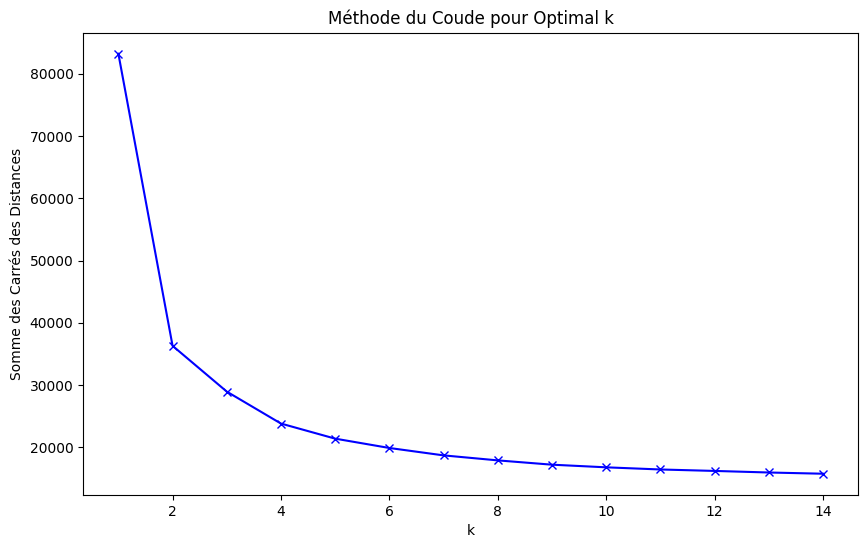

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Préparation des données pour le clustering
# Supposons que vous ayez déjà réduit les dimensions de vos vecteurs de caractéristiques
data_for_clustering = np.array(test_df['reduced_features'].tolist())

# Tester K-means avec différents nombres de clusters
sum_of_squared_distances = []
K = range(1, 15)  # Par exemple, tester de 1 à 14 clusters
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_for_clustering)
    sum_of_squared_distances.append(km.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Somme des Carrés des Distances')
plt.title('Méthode du Coude pour Optimal k')
plt.show()

On va choisir 4 cluster 

## K-means avec le Nombre Optimal de Clusters

In [23]:
# Remplacer 'k_optimal' par le nombre de clusters choisi
k_optimal = 4 

# Création du modèle K-means
kmeans = KMeans(n_clusters=k_optimal)
kmeans = kmeans.fit(data_for_clustering)

# Ajout des étiquettes de cluster au DataFrame
test_df['cluster'] = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_27/2446745586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cluster'] = kmeans.labels_


# Identifier les Mots-Clés les Plus Fréquents

In [27]:
from collections import Counter
import itertools

# Vous devez définir n_clusters sur le nombre de clusters que vous avez choisi précédemment.
n_clusters = k_optimal

# Fonction pour extraire les mots les plus fréquents
def get_top_keywords(data, n=10):
    words = data.str.split().tolist()
    words = list(itertools.chain(*words))
    # Supposons que vous avez une liste des stop words à exclure
    # words_filtered = [word for word in words if word not in stop_words]
    common_words = Counter(words).most_common(n)
    return common_words

# Afficher les mots les plus fréquents pour chaque cluster
for i in range(n_clusters):
    print(f"Cluster {i} : Mots-clés les plus fréquents\n")
    common_words = get_top_keywords(test_df[test_df['cluster'] == i]['cleaned_text'])
    print(common_words)
    print("-" * 50)


Cluster 0 : Mots-clés les plus fréquents

[('de', 551038), ('la', 308212), ('le', 236364), ('l', 227955), ('et', 217186), ('à', 186806), ('des', 185723), ('les', 177205), ('d', 144007), ('du', 141076)]
--------------------------------------------------
Cluster 1 : Mots-clés les plus fréquents

[('de', 36568), ('la', 21477), ('le', 17176), ('l', 14278), ('à', 12491), ('du', 11092), ('et', 10932), ('des', 10471), ('les', 10011), ('a', 9002)]
--------------------------------------------------
Cluster 2 : Mots-clés les plus fréquents

[('de', 100193), ('la', 58851), ('le', 47197), ('l', 41248), ('à', 33837), ('et', 32512), ('des', 30936), ('les', 29573), ('du', 27506), ('a', 27004)]
--------------------------------------------------
Cluster 3 : Mots-clés les plus fréquents

[('de', 1891), ('la', 1286), ('le', 886), ('à', 713), ('et', 620), ('a', 609), ('du', 589), ('l', 561), ('les', 552), ('en', 400)]
--------------------------------------------------


In [35]:
# !pip install spacy
# !python -m spacy download fr_core_news_sm

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS

# Charger le modèle de langue française de spaCy
nlp = spacy.load('fr_core_news_sm')

# Liste supplémentaire de mots à exclure
additional_exclusions = {"l", "d", "s", "n", "c", "qu"}

# Mettre à jour les stop words
stop_words = STOP_WORDS.union(additional_exclusions)

def get_top_keywords(data, n=10):
    words = data.str.split().tolist()
    words = list(itertools.chain(*words))
    words_filtered = [word for word in words if word not in stop_words and len(word) > 2]
    common_words = Counter(words_filtered).most_common(n)
    return common_words

# Afficher les mots les plus fréquents pour chaque cluster, à l'exclusion des stop words
for i in range(n_clusters):
    print(f"Cluster {i} : Mots-clés les plus fréquents sans stop words\n")
    common_words = get_top_keywords(test_df[test_df['cluster'] == i]['cleaned_text'])
    print(common_words)
    print("-" * 50)

Cluster 0 : Mots-clés les plus fréquents sans stop words

[('été', 143), ('ans', 68), ('suite', 67), ('bénin', 63), ('président', 60), ('juillet', 54), ('pays', 49), ('contre', 48), ('burkinabè', 47), ('mercredi', 46)]
--------------------------------------------------
Cluster 1 : Mots-clés les plus fréquents sans stop words

[('été', 22983), ('pays', 20204), ('sénégal', 15365), ('faire', 14893), ('afrique', 11868), ('président', 11331), ('contre', 10263), ('bien', 10068), ('ministre', 9479), ('politique', 9052)]
--------------------------------------------------
Cluster 2 : Mots-clés les plus fréquents sans stop words

[('été', 6375), ('pays', 3658), ('président', 3480), ('sénégal', 3024), ('bénin', 2749), ('ministre', 2458), ('contre', 2403), ('afrique', 2107), ('faire', 2092), ('gouvernement', 1928)]
--------------------------------------------------
Cluster 3 : Mots-clés les plus fréquents sans stop words

[('été', 2869), ('sénégal', 1560), ('président', 1285), ('dakar', 1072), ('c

# Nombre d'articles par cluster

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_27/3596835731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cluster'] = kmeans.fit_predict(data_for_clustering)


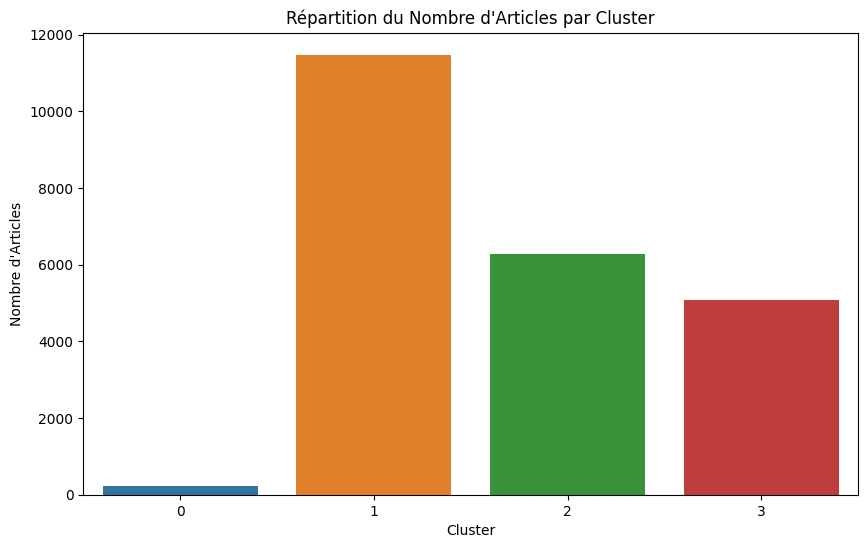

In [30]:
import seaborn as sns

# Supposons que vous avez choisi un nombre optimal de clusters, par exemple 6
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k)
test_df['cluster'] = kmeans.fit_predict(data_for_clustering)

# Créer un histogramme pour visualiser la répartition du nombre d'articles par cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=test_df)
plt.title('Répartition du Nombre d\'Articles par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'Articles')
plt.show()


In [37]:
k_optimal = 4  # ou le nombre de clusters que vous avez déterminé être optimal
# Compter le nombre d'articles dans chaque cluster
cluster_counts = test_df['cluster'].value_counts().sort_index()

# Afficher la somme des articles pour chaque cluster
for cluster_num in range(k_optimal):
    print(f"Cluster {cluster_num}: {cluster_counts.get(cluster_num, 0)} articles")


Cluster 0: 11478 articles
Cluster 1: 5073 articles
Cluster 2: 6274 articles
Cluster 3: 237 articles


# Article le plus proche du centroïde de chaque cluster

In [36]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Assurez-vous que kmeans est ajusté avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data_for_clustering)

# Sauvegarder les centroïdes
centroids = kmeans.cluster_centers_

# Attribuer les étiquettes de cluster à votre DataFrame
test_df['cluster'] = kmeans.labels_

# Trouver l'article le plus représentatif pour chaque cluster
for cluster_num in range(k_optimal):
    # Récupérer les caractéristiques des articles de ce cluster
    cluster_features = data_for_clustering[test_df['cluster'] == cluster_num]
    
    # Calculer la distance euclidienne de chaque article du cluster à son centroïde
    distances = [distance.euclidean(article, centroids[cluster_num]) for article in cluster_features]
    
    # Trouver l'index de l'article le plus proche du centroïde
    closest_article_index = distances.index(min(distances))
    
    # Récupérer l'article le plus représentatif en utilisant l'index
    closest_article = test_df.iloc[test_df[test_df['cluster'] == cluster_num].index[closest_article_index]]
    
    print(f"Cluster {cluster_num}: Article le plus représentatif :\n{closest_article['cleaned_text']}\n")
    print("-" * 80)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_27/1738092552.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cluster'] = kmeans.labels_


Cluster 0: Article le plus représentatif :
 aux ott des solutions pour stopper l hémorragie les soucis des opérateurs classiques face à la concurrence des sont compréhensibles estime ingénieur en télécommunications et réseaux et membre du collège de l autorité de régulation des télécommunications et des postes du sénégal artp cependant il pense que des pistes de solutions existent pour stopper l hémorragie subie par les opérateurs une ou over the top service est un service sur internet audio vidéo sms et autres médias qui se fait sans la participation d un opérateur de réseau classique dans le contrôle et la distribution du contenu mais qui consomme de la bande passante les les plus connus au sénégal sont whatsapp viber messenger skype un service est fourni à travers les réseaux d un opérateur mobile ce qui est vécu par les opérateurs classiques comme une concurrence déloyale un opérateur classique comme la sonatel a enregistré milliards de fcfa de perte en à cause de ces selon son dir